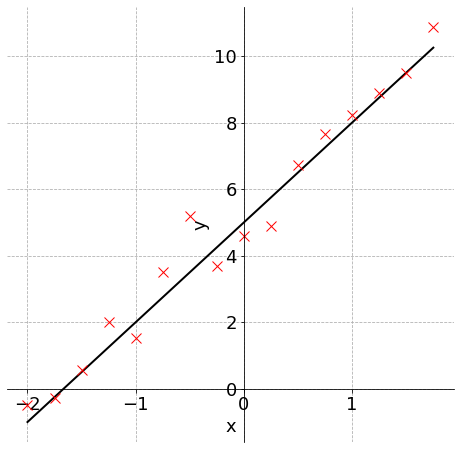

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

a = 3 # True slope
b = 5
x = np.arange(-2,2,0.25)
x = x.reshape(-1, 1)
y = a*x + b + np.random.randn(*x.shape) # Add noise
# y = a*x + np.random.randn(x.shape[0],x.shape[1])

fig, ax = plt.subplots()
ax.plot(x, a*x+b, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


In [2]:
x

array([[-2.  ],
       [-1.75],
       [-1.5 ],
       [-1.25],
       [-1.  ],
       [-0.75],
       [-0.5 ],
       [-0.25],
       [ 0.  ],
       [ 0.25],
       [ 0.5 ],
       [ 0.75],
       [ 1.  ],
       [ 1.25],
       [ 1.5 ],
       [ 1.75]])

In [3]:
A = np.concatenate((x,np.ones(x.shape)),axis=1)
A

array([[-2.  ,  1.  ],
       [-1.75,  1.  ],
       [-1.5 ,  1.  ],
       [-1.25,  1.  ],
       [-1.  ,  1.  ],
       [-0.75,  1.  ],
       [-0.5 ,  1.  ],
       [-0.25,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.25,  1.  ],
       [ 0.5 ,  1.  ],
       [ 0.75,  1.  ],
       [ 1.  ,  1.  ],
       [ 1.25,  1.  ],
       [ 1.5 ,  1.  ],
       [ 1.75,  1.  ]])

In [4]:
y

array([[-0.48341416],
       [-0.27683971],
       [ 0.55414847],
       [ 2.00332728],
       [ 1.51130797],
       [ 3.51438046],
       [ 5.18262221],
       [ 3.68840485],
       [ 4.57861768],
       [ 4.89035908],
       [ 6.73236924],
       [ 7.65194344],
       [ 8.22054478],
       [ 8.88063272],
       [ 9.49909102],
       [10.88040435]])

In [11]:
A = np.concatenate((np.ones(x.shape), x),axis=1)

U, S, VT = np.linalg.svd(A,full_matrices=False)
b_pred, a_pred = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y # Least-square fit
b_pred, a_pred

(array([5.1849632]), array([2.96575575]))

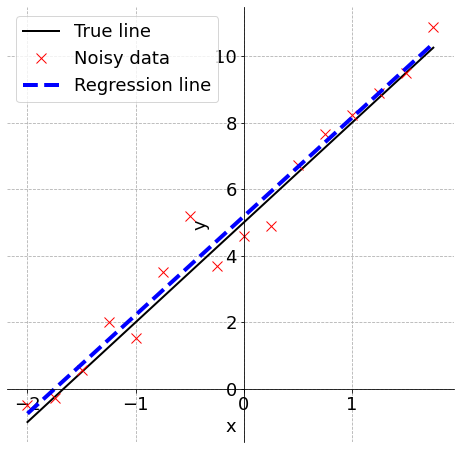

In [12]:
fig, ax = plt.subplots()

ax.plot(x, a*x+b, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

ax.plot(x,a_pred * x + b_pred,'--',color='b',linewidth=4, label='Regression line')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.legend()
plt.show()

In [13]:
# Methods of computing regression
atilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y
atilde2 = np.linalg.pinv(A) @ y

print('pseudo inverse by svd:')
print(atilde1)
print('left pseudo inverse:')
print(atilde2)

pseudo inverse by svd:
[[5.1849632 ]
 [2.96575575]]
left pseudo inverse:
[[5.1849632 ]
 [2.96575575]]


In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(A, y)
reg.coef_, reg.intercept_

(array([[0.        , 2.96575575]]), array([5.1849632]))